In [ ]:
# Gerekli kütüphaneleri içe aktaralım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
import datetime
import warnings
import os
from google.colab import drive
import zipfile
import time

# Matplotlib ve seaborn ayarlarını yapalım
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

# Matplotlib figürlerinin boyutunu ayarlayalım
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12


In [ ]:
# Google Drive'ı bağlayalım
drive.mount('/content/drive')


# In[3]:


# Veri setinin Drive'daki konumunu belirtelim
# NOT: Veri setinin Google Drive'a önceden yüklenmiş olması gerekiyor
data_path = '/content/drive/MyDrive/cs414_yeni/pepe-transfers.csv'

Mounted at /content/drive


In [ ]:
sample_df = pd.read_csv(data_path, nrows=5)
print("Sample:")
sample_df.head()

Sample:


,block_number,timestamp,date,from_address,to_address,value_token,value_base,transaction_index,log_index,transaction_hash
0,17050363,1681536587,2023-Apr-15T07:29:47Z,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,6.044788e+11,604478780314562436526661163632,59,162,0xc321dac6609df6c3baf3512be31a967d93397a79c597...
1,17050354,1681536479,2023-Apr-15T07:27:59Z,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,1.311359e+11,131135861213042893154914604963,70,287,0xb745bfba489c1abe20a5fbc72a655fa5ba18ded2ce84...
2,17050352,1681536455,2023-Apr-15T07:27:35Z,0x4a5a7331da84d3834c030a9b8d4f3d687a3b788b,0x4a5a7331da84d3834c030a9b8d4f3d687a3b788b,3.717649e+11,371764915766751234543927965993,115,262,0x2036f8a047ca64006862e99049150f14ccacfb4e3a73...
3,17050352,1681536455,2023-Apr-15T07:27:35Z,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,3.717649e+11,371764915766751234543927965993,115,257,0x2036f8a047ca64006862e99049150f14ccacfb4e3a73...
4,17050350,1681536431,2023-Apr-15T07:27:11Z,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,7.920714e+10,79207141801681976718549271230,126,323,0x0ae21fcaf097b54cc2049777df2018e65822eea74709...


In [ ]:
df = pd.read_csv(data_path)
print("Missing values per column:")
df.isna().sum()

# %% [markdown]
# Now let's convert the timestamp to a proper datetime format and explore the date range of our dataset.

# %%
# Convert timestamp to datetime
df['date'] = pd.to_datetime(df['date'])

# Check time range
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Total days: {(df['date'].max() - df['date'].min()).days}")

print("Types:")
sample_df.dtypes

Types:


,0
block_number,int64
timestamp,int64
date,object
from_address,object
to_address,object
value_token,float64
value_base,object
transaction_index,int64
log_index,int64
transaction_hash,object


In [ ]:
# %%
# Check for missing values

df = pd.read_csv(data_path)
print("Missing values per column:")
df.isna().sum()

# %% [markdown]
# Now let's convert the timestamp to a proper datetime format and explore the date range of our dataset.

# %%
# Convert timestamp to datetime
df['date'] = pd.to_datetime(df['date'])

# Check time range
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Total days: {(df['date'].max() - df['date'].min()).days}")

Missing values per column:
Date range: 2023-04-14 16:51:35+00:00 to 2023-05-08 10:26:35+00:00
Total days: 23


Token transfer statistics:


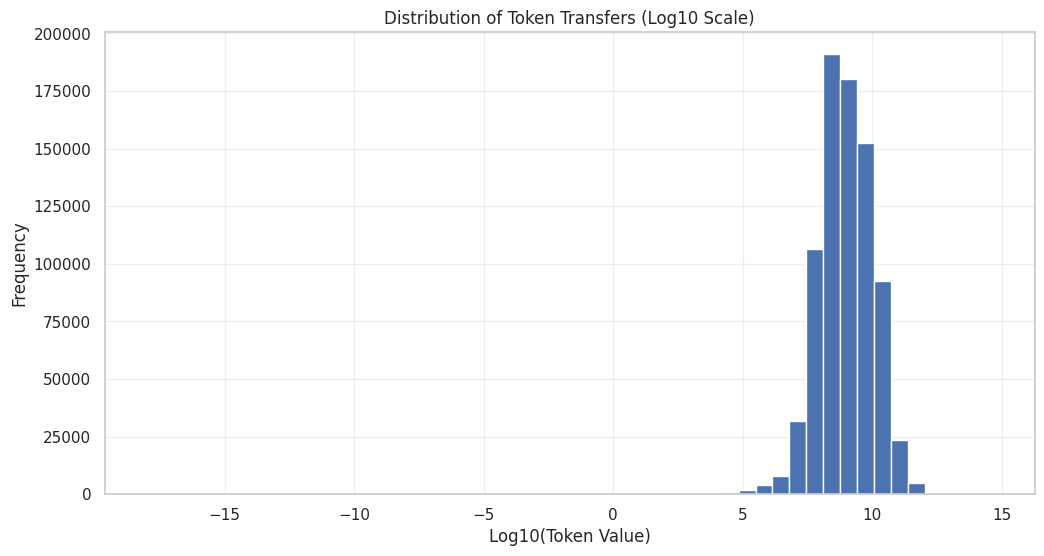

In [ ]:
# Basic statistics of token transfers
print("Token transfer statistics:")
df['value_token'].describe()

# %% [markdown]
# Let's check the distribution of token values to understand the transfer patterns.

# %%
# Plot histogram of token values (log scale)
plt.figure(figsize=(12, 6))
df['value_token'].apply(lambda x: np.log10(x) if x > 0 else 0).hist(bins=50)
plt.title('Distribution of Token Transfers (Log10 Scale)')
plt.xlabel('Log10(Token Value)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
df.describe()

,block_number,timestamp,value_token,transaction_index,log_index
count,8.009550e+05,8.009550e+05,8.009550e+05,800955.000000,800955.000000
mean,1.714966e+07,1.682746e+09,1.318891e+10,80.442673,202.735466
std,4.676130e+04,5.680853e+05,6.634689e+11,60.132155,138.733431
min,1.704610e+07,1.681484e+09,0.000000e+00,0.000000,0.000000
25%,1.710312e+07,1.682181e+09,1.873315e+08,31.000000,101.000000
50%,1.716388e+07,1.682919e+09,8.590582e+08,79.000000,192.000000
75%,1.719161e+07,1.683255e+09,5.337008e+09,115.000000,281.000000
max,1.721458e+07,1.683534e+09,4.206900e+14,1016.000000,6923.000000


In [ ]:
# %%
# Create a directed graph
G = nx.DiGraph()

# Add edges with weights from the dataset
print("Building the network...")
# Add all nodes first (addresses)
unique_addresses = set(df['from_address'].unique()).union(set(df['to_address'].unique()))
G.add_nodes_from(unique_addresses)
print(f"Added {len(G.nodes())} unique addresses as nodes")

# Add weighted edges based on token transfers
edge_weights = {}
# Iterate through dataframe rows
for _, row in df.iterrows():
    from_addr = row['from_address']
    to_addr = row['to_address']
    value = row['value_token']

    # If the edge already exists, add to its weight
    if G.has_edge(from_addr, to_addr):
        edge_weights[(from_addr, to_addr)] += value
    else:
        edge_weights[(from_addr, to_addr)] = value

# Add all edges with their accumulated weights
for (from_addr, to_addr), weight in edge_weights.items():
    G.add_edge(from_addr, to_addr, weight=weight)

print(f"Added {len(G.edges())} edges to the network")

Building the network...
Added 88821 unique addresses as nodes
Added 88821 edges to the network


In [ ]:
# %%
# Basic network statistics
print("Network Summary:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.6f}")

Network Summary:
Number of nodes: 88821
Number of edges: 88821
Network density: 0.000011


In [ ]:
# Check if the graph is connected
# For directed graphs, we should check strongly and weakly connected components
scc = list(nx.strongly_connected_components(G))
wcc = list(nx.weakly_connected_components(G))
print(f"Number of strongly connected components: {len(scc)}")
print(f"Size of largest strongly connected component: {len(max(scc, key=len))}")
print(f"Number of weakly connected components: {len(wcc)}")
print(f"Size of largest weakly connected component: {len(max(wcc, key=len))}")

Number of strongly connected components: 88821
Size of largest strongly connected component: 1
Number of weakly connected components: 88821
Size of largest weakly connected component: 1


In [ ]:
# %%
# Calculate in-degree, out-degree, and total degree
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
total_degrees = {node: in_degrees.get(node, 0) + out_degrees.get(node, 0) for node in G.nodes()}

# Convert to lists for easier plotting
in_degree_values = list(in_degrees.values())
out_degree_values = list(out_degrees.values())
total_degree_values = list(total_degrees.values())

# Plot degree distributions (log-log)
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

In [ ]:
# Function to compute CCDF (Complementary Cumulative Distribution Function)
def ccdf(data):
    counter = Counter(data)
    probs = {}
    for k, v in counter.items():
        probs[k] = v / len(data)

    # Sort unique values
    unique_values = sorted(probs.keys())

    # Calculate CCDF
    ccdf_values = []
    cumulative = 0
    for value in unique_values:
        cumulative += probs[value]
        ccdf_values.append(1 - cumulative)

    return unique_values, ccdf_values

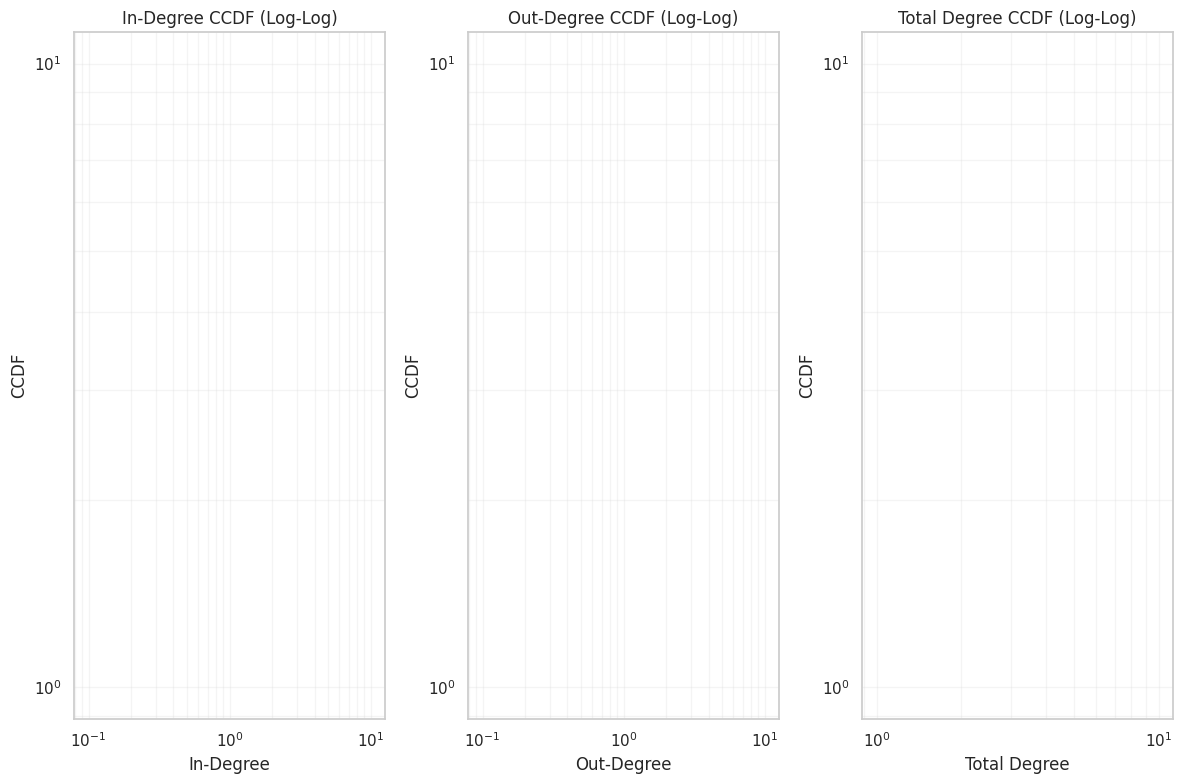

In [ ]:
# In-degree distribution
plt.subplot(1, 3, 1)
x, y = ccdf(in_degree_values)
plt.loglog(x, y, 'o-', markersize=3, alpha=0.7)
plt.title('In-Degree CCDF (Log-Log)')
plt.xlabel('In-Degree')
plt.ylabel('CCDF')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Out-degree distribution
plt.subplot(1, 3, 2)
x, y = ccdf(out_degree_values)
plt.loglog(x, y, 'o-', markersize=3, alpha=0.7)
plt.title('Out-Degree CCDF (Log-Log)')
plt.xlabel('Out-Degree')
plt.ylabel('CCDF')
plt.grid(True, which="both", ls="-", alpha=0.2)

# Total degree distribution
plt.subplot(1, 3, 3)
x, y = ccdf(total_degree_values)
plt.loglog(x, y, 'o-', markersize=3, alpha=0.7)
plt.title('Total Degree CCDF (Log-Log)')
plt.xlabel('Total Degree')
plt.ylabel('CCDF')
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()